## Rod Pump Failure Analysis: EDA Assignment

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Load data, parse datetime columns, and replace `lifetime_start` and `lifetime_end` with `lifetime`.

In [3]:
raw_data = pd.read_csv('../rodpump_raw.csv', parse_dates=['lifetime_start','lifetime_end'])
raw_data['lifetimedays'] = (raw_data['lifetime_end'] - raw_data['lifetime_start']).dt.days
del raw_data['FAILSTART']
del raw_data['lifetime_end']
del raw_data['lifetime_start']

Plot heatmap prior to removing non-failures

<AxesSubplot:>

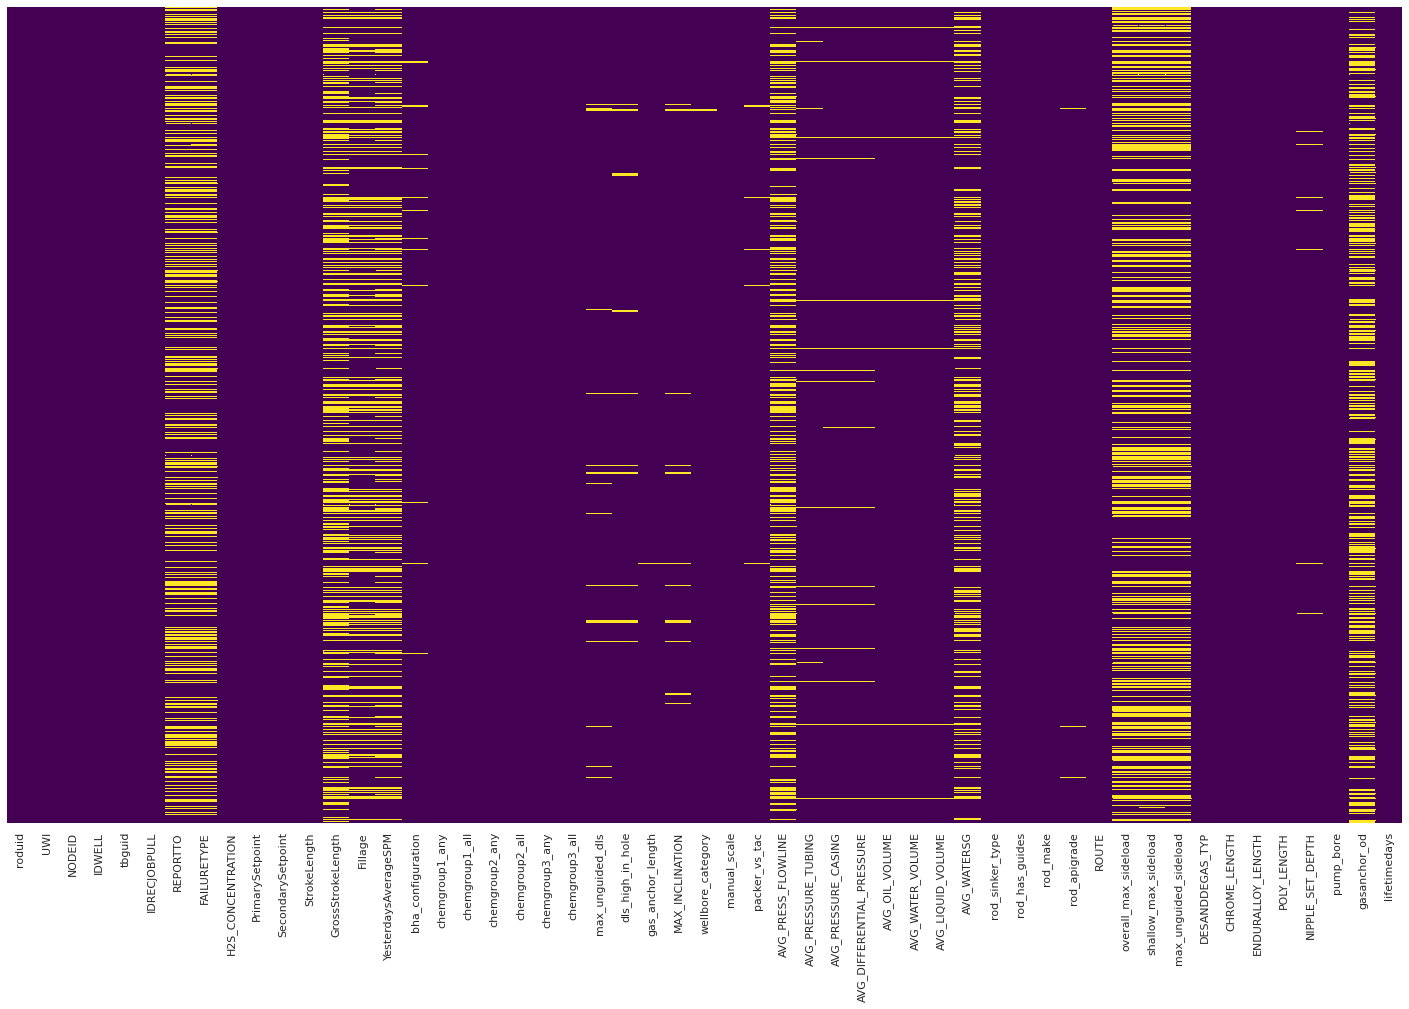

In [4]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Remove non-failures and compare heatmap

In [6]:
raw_data = raw_data[raw_data['FAILURETYPE'].notnull()]

<AxesSubplot:>

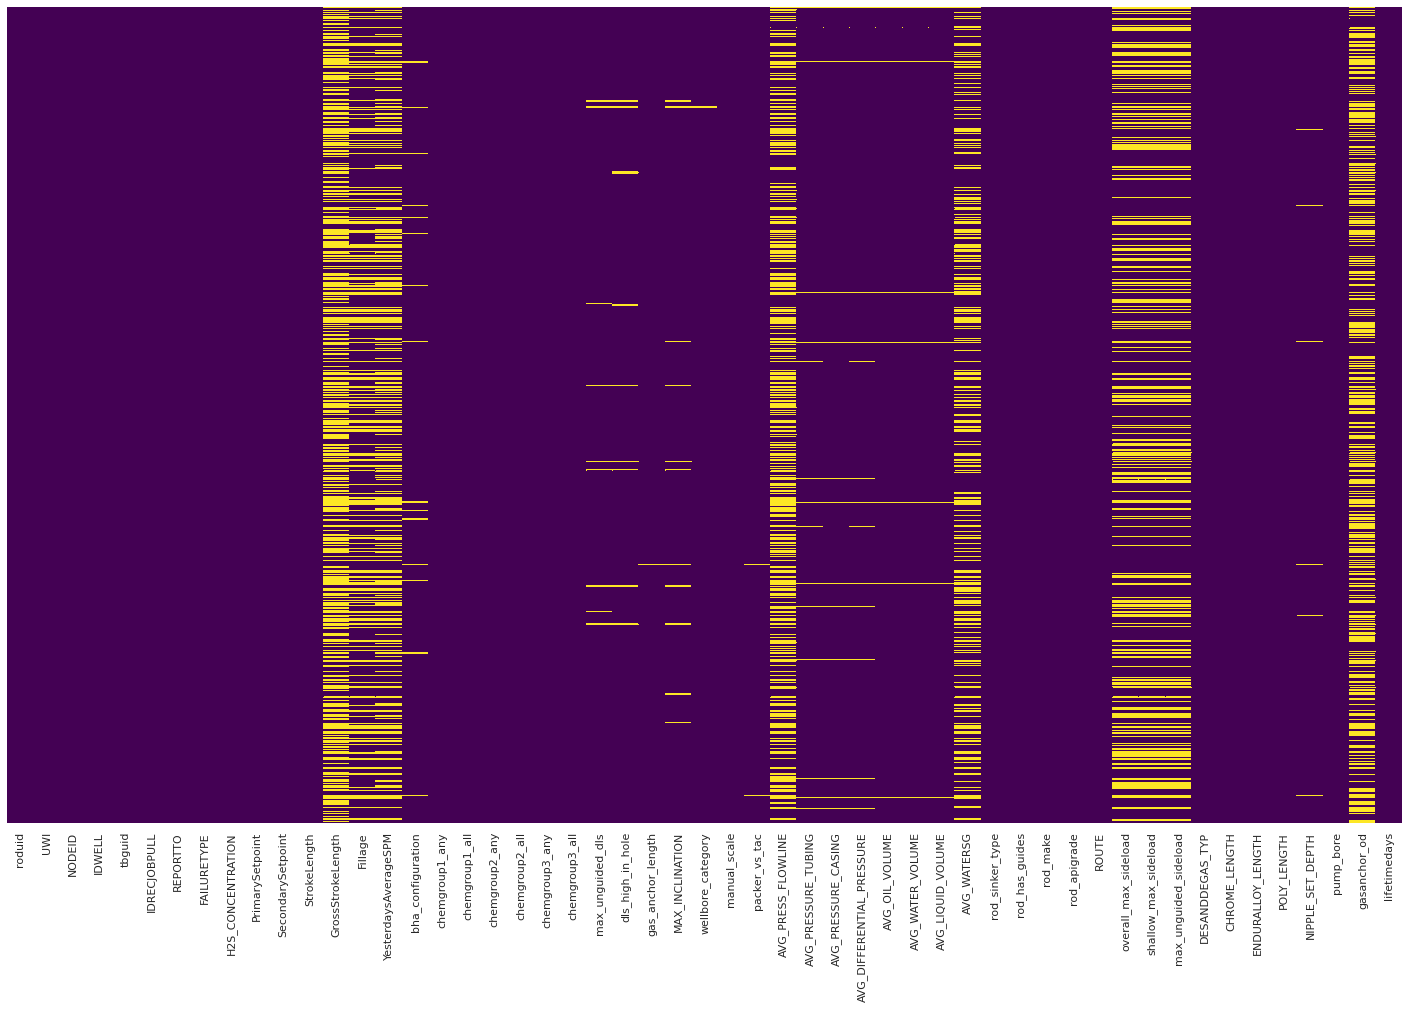

In [7]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Null values will be the biggest challenge we face throughout this project